In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

clients_id = pd.read_csv("./clients_id_c.csv")
products_id = pd.read_csv("./products_id_c.csv")
transactions = pd.read_csv("./transactions_c.csv")

In [13]:
merge_table = pd.merge(transactions, clients_id, on="client_id")
merge_table = pd.merge(merge_table, products_id, on="id_prod")
merge_table = merge_table.reindex(columns= ["session_id", "date", "client_id", "sex", "birth", "id_prod", "price", "categ"])
display(merge_table.head())

,session_id,date,client_id,sex,birth,id_prod,price,categ
0,s_18746,2021-04-10 18:37:28.723910,c_4450,f,1977,0_1483,4.99,0
1,s_140787,2021-12-27 11:11:12.123067,c_5433,f,1981,0_1483,4.99,0
2,s_110736,2021-10-27 04:56:38.293970,c_857,m,1985,0_1483,4.99,0
3,s_57626,2021-07-04 06:43:45.676567,c_3679,f,1989,0_1483,4.99,0
4,s_92165,2021-09-19 08:45:43.735331,c_1609,m,1980,0_1483,4.99,0


In [14]:
merge_table.describe(include="all").round(2)

,session_id,date,client_id,sex,birth,id_prod,price,categ
count,336713,336713,336713,336713,336713.00,336713,336713.00,336713.00
unique,169173,336713,8600,2,NaN,3264,NaN,NaN
top,s_118668,2021-04-10 18:37:28.723910,c_1609,m,NaN,1_369,NaN,NaN
freq,14,1,12855,169198,NaN,1081,NaN,NaN
mean,NaN,NaN,NaN,NaN,1977.82,NaN,17.22,0.43
std,NaN,NaN,NaN,NaN,13.52,NaN,17.86,0.59
min,NaN,NaN,NaN,NaN,1929.00,NaN,0.62,0.00
25%,NaN,NaN,NaN,NaN,1971.00,NaN,8.61,0.00
50%,NaN,NaN,NaN,NaN,1980.00,NaN,13.90,0.00
75%,NaN,NaN,NaN,NaN,1987.00,NaN,18.99,1.00


In [12]:
print("CV de Birth :", merge_table["birth"].std()/merge_table["birth"].mean())
print("CV de Price :", merge_table["price"].std()/merge_table["price"].mean())

CV de Birth : 0.0068380383005711394
CV de Price : 1.0371913943019737


# Representation graphique

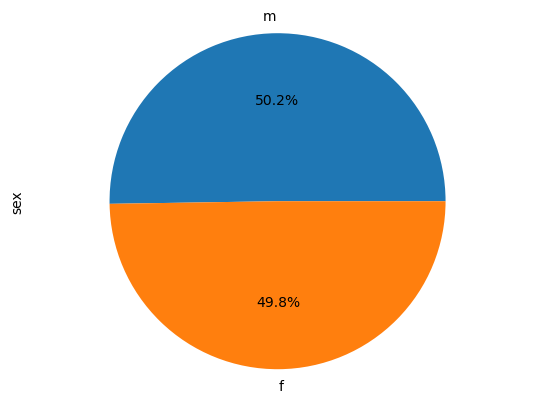

In [22]:
merge_table["sex"].value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')
plt.axis('equal') 
plt.show() # Affiche le graphique

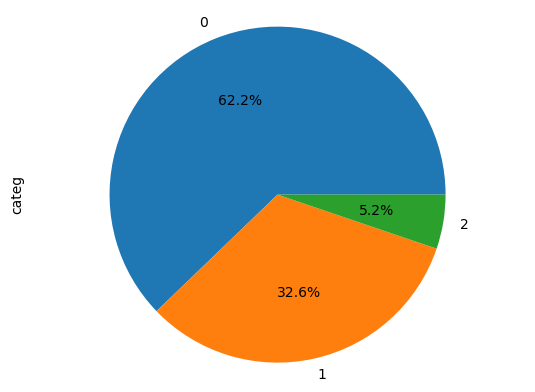

In [23]:
merge_table["categ"].value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')
plt.axis('equal') 
plt.show() # Affiche le graphique

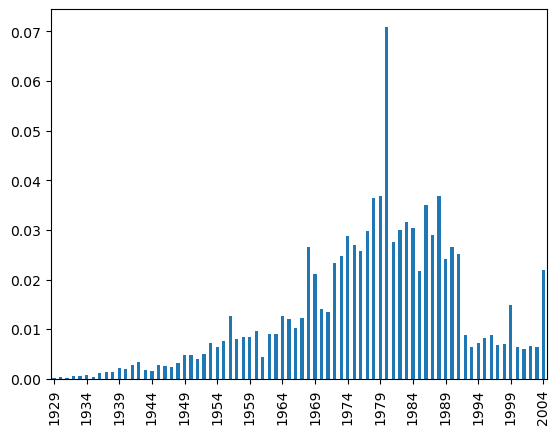

In [34]:
merge_table["birth"].value_counts(normalize=True).sort_index().plot(kind='bar',width=0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.show()

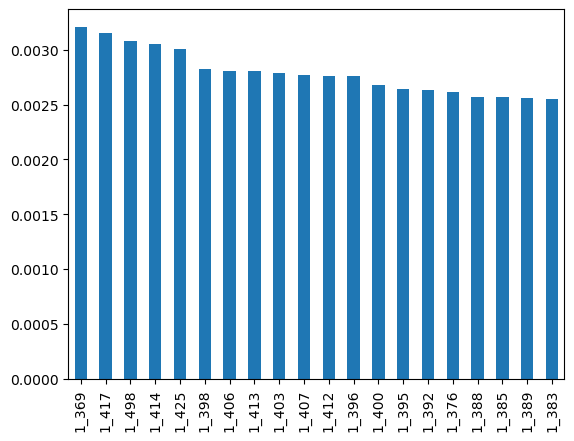

In [40]:
merge_table["id_prod"].value_counts(normalize=True).head(20).plot(kind='bar',width=0.5)
plt.show()